<a href="https://colab.research.google.com/github/as2c/MLP---Cosmology/blob/main/NN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this code, our objective is to train some neural network models on our test data.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import timeit
import time
%alias_magic t timeit

plt.style.use('seaborn-talk')

from matplotlib import rcParams

# import warnings filter
from warnings import simplefilter 
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 18
plt.rc('figure', figsize=(10,6))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

# Import phase I data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Gadget 2 Data / with Neutrino

In [4]:
data = pd.read_csv(r'/content/drive/MyDrive/denc_Neutrino')
# data['in_halo'] = (data['haloID']>0).astype('int')
data['in_halo'] = (data['halo_mass']>1600).astype('int32')
data

id  haloID  halo_mass  ...  dc for 18.1  dc for 20.0  in_halo
0      10156552     755     2280.0  ...    -0.011940    -0.010111        1
1      11068486      85     1539.0  ...    -0.011500    -0.012220        0
2       9530036     654     1944.0  ...     0.005231     0.003787        1
3      11455022     752     1394.0  ...    -0.000868     0.001568        0
4       8591034     356     1649.0  ...     0.013111     0.013433        1
...         ...     ...        ...  ...          ...          ...      ...
99995   2160800     451     2634.0  ...    -0.005002     0.000918        1
99996   3257728      43     1112.0  ...     0.002627     0.006124        0
99997   6101605     484     1198.0  ...    -0.017154    -0.012600        0
99998   4576456      44     1058.0  ...    -0.007463     0.004673        0
99999  13755625     374     3436.0  ...     0.013776     0.014595        1

[100000 rows x 16 columns]

In [5]:
data.describe()

id         haloID  ...    dc for 20.0        in_halo
count  1.000000e+05  100000.000000  ...  100000.000000  100000.000000
mean   8.716004e+06     424.627710  ...      -0.000224       0.557930
std    3.549230e+06     230.962533  ...       0.010084       0.496635
min    2.131444e+06      16.000000  ...      -0.038371       0.000000
25%    5.953820e+06     238.000000  ...      -0.006964       0.000000
50%    9.043250e+06     418.000000  ...      -0.000713       1.000000
75%    1.176120e+07     619.000000  ...       0.006694       1.000000
max    1.464652e+07     870.000000  ...       0.032602       1.000000

[8 rows x 16 columns]

### Visualize Data

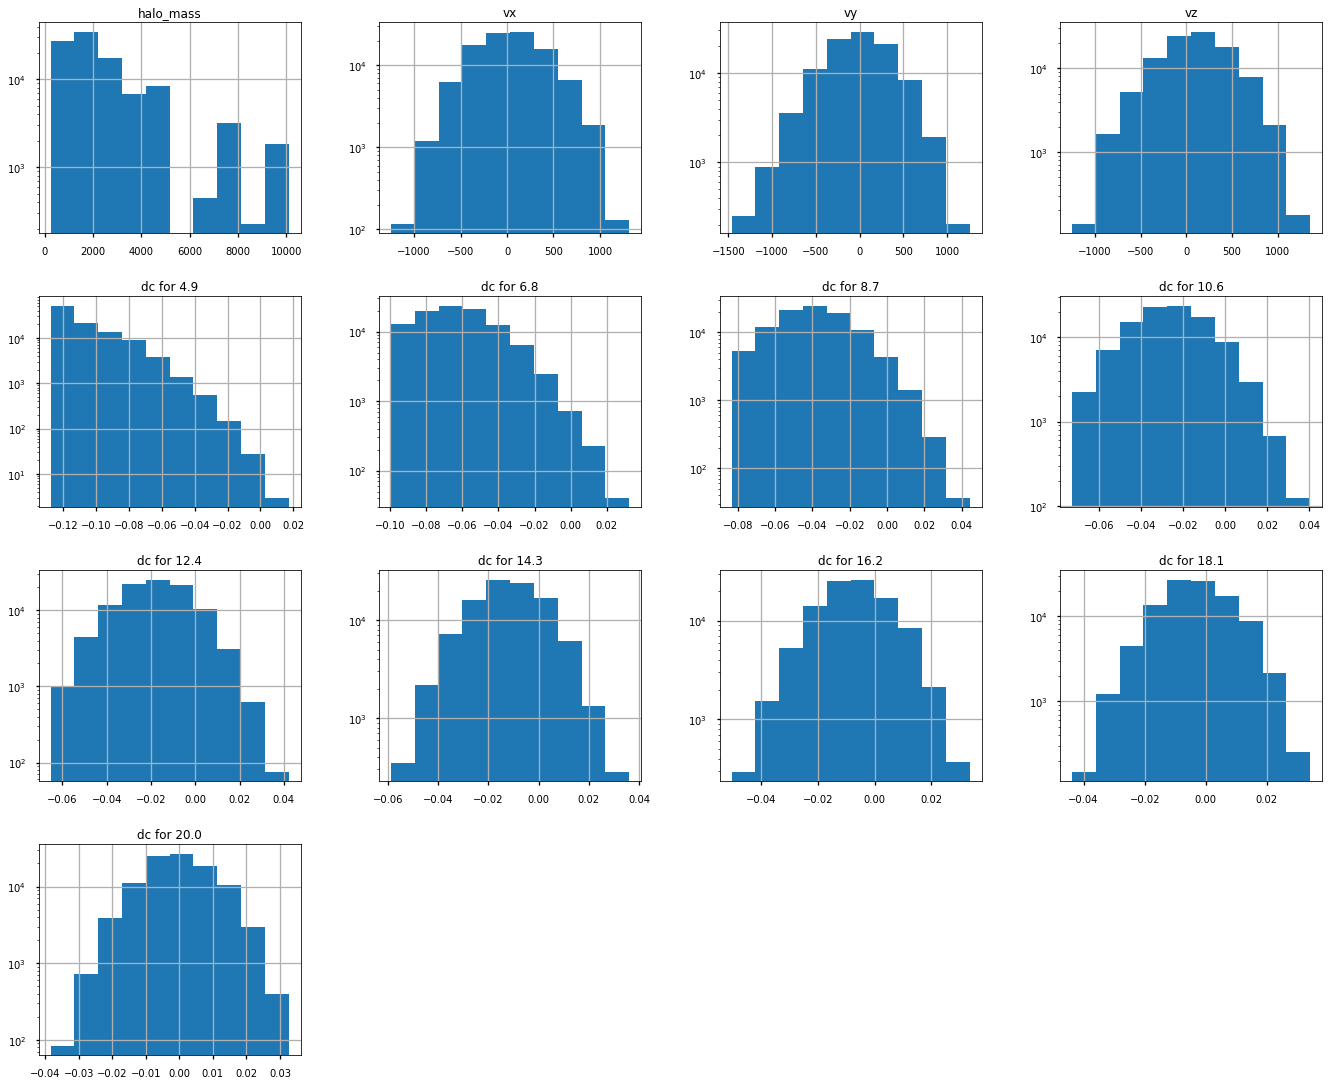

In [6]:
data.iloc[:,2:15].hist(figsize=(23,19), log=True)
plt.show()

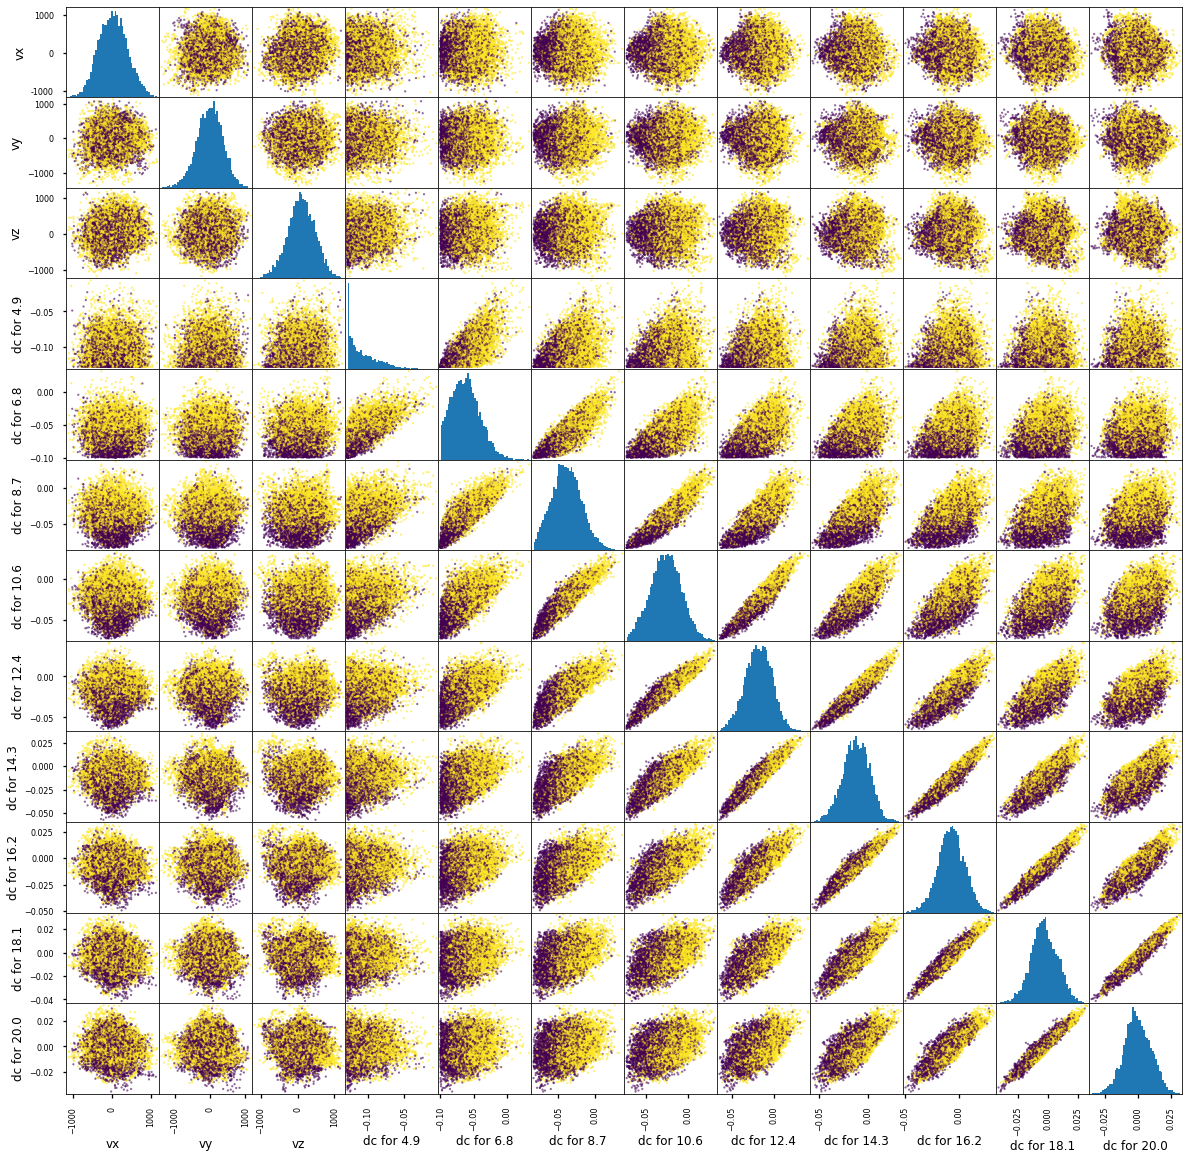

In [7]:
N_sample=10_000
data_mini = data.sample(N_sample , random_state=0)
target = 'in_halo'

_=pd.plotting.scatter_matrix(data_mini.iloc[:,3:15], c=data_mini[target] , cmap = plt.cm.viridis,
                            figsize=(20,20), marker='o', s=5, 
                            hist_kwds={'bins':50} , alpha = .6)

### Gadget 2 Data / without Neutrino

In [7]:
data_cdm = pd.read_csv(r'/content/drive/MyDrive/denc_CDM')
data_cdm['in_halo'] = (data_cdm['halo_mass']>1600).astype('int32')
data_cdm

id  haloID  halo_mass  ...  dc for 18.1  dc for 20.0  in_halo
0       8981131     414     1504.0  ...     0.691070     0.457584        0
1       9901676    1026     1013.0  ...     0.617267     0.431845        0
2       8288987    1079      727.0  ...     0.003315     0.076079        0
3       4842631     675     1268.0  ...    -0.334146    -0.231578        0
4      12884124     437     6128.0  ...     0.049055     0.101472        1
...         ...     ...        ...  ...          ...          ...      ...
99995  12466311    1085     5542.0  ...     0.103515     0.090791        1
99996  11857185     491      691.0  ...    -0.347015    -0.253660        0
99997   9340191     947      868.0  ...    -0.175261    -0.202931        0
99998  13317963    1034     1175.0  ...    -0.282089    -0.284524        0
99999   5325551      45      818.0  ...     0.096964    -0.043834        0

[100000 rows x 16 columns]

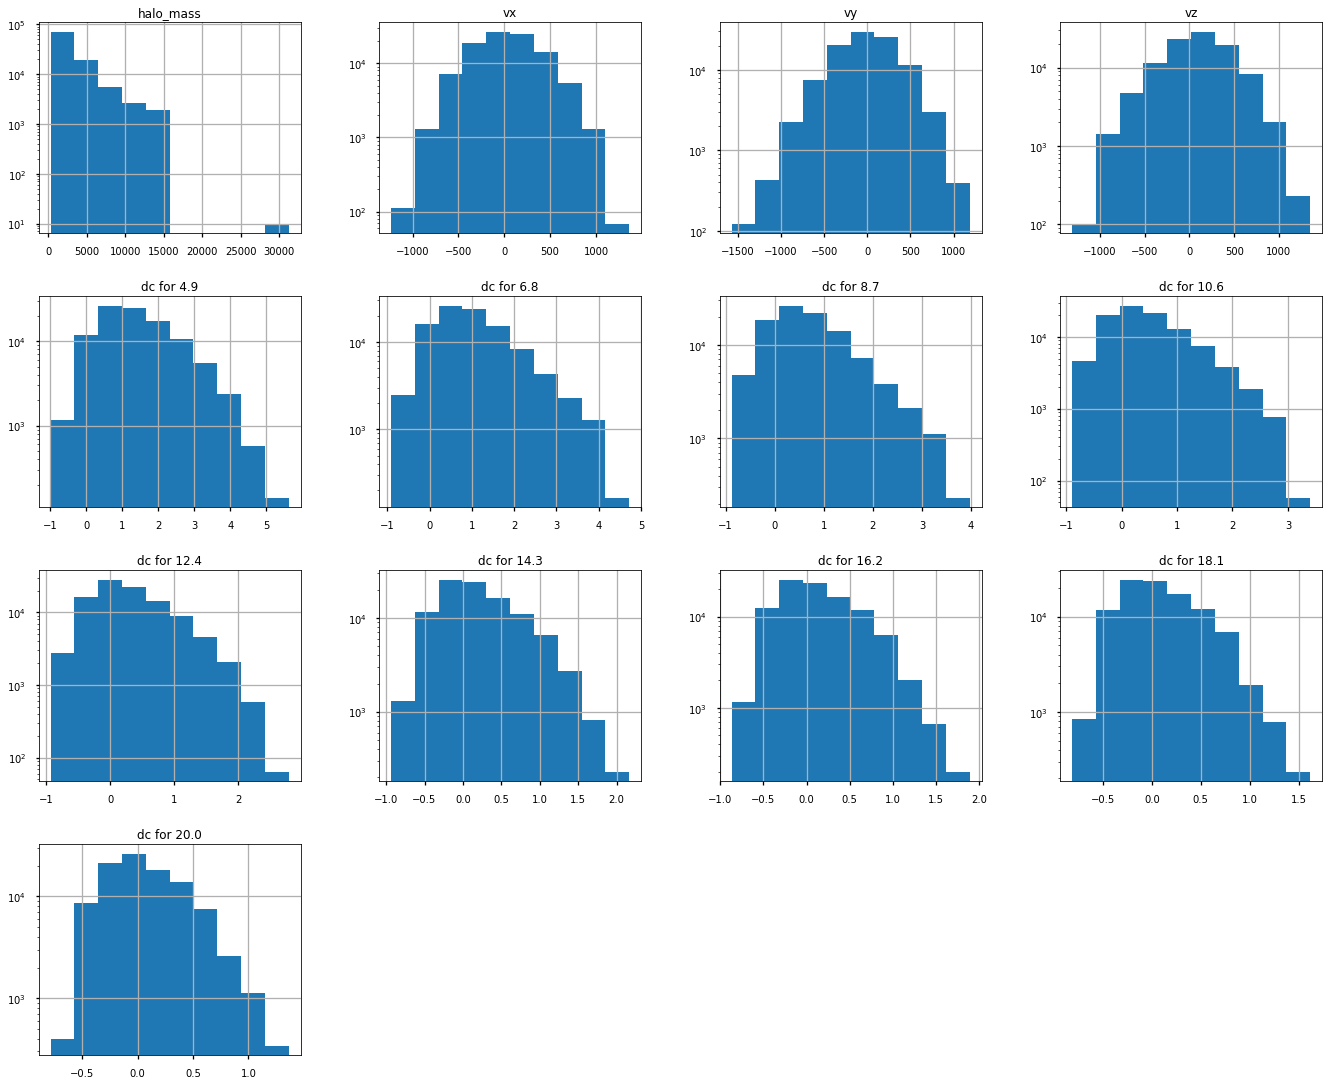

In [9]:
data_cdm.iloc[:,2:15].hist(figsize=(23,19), log=True)
plt.show()

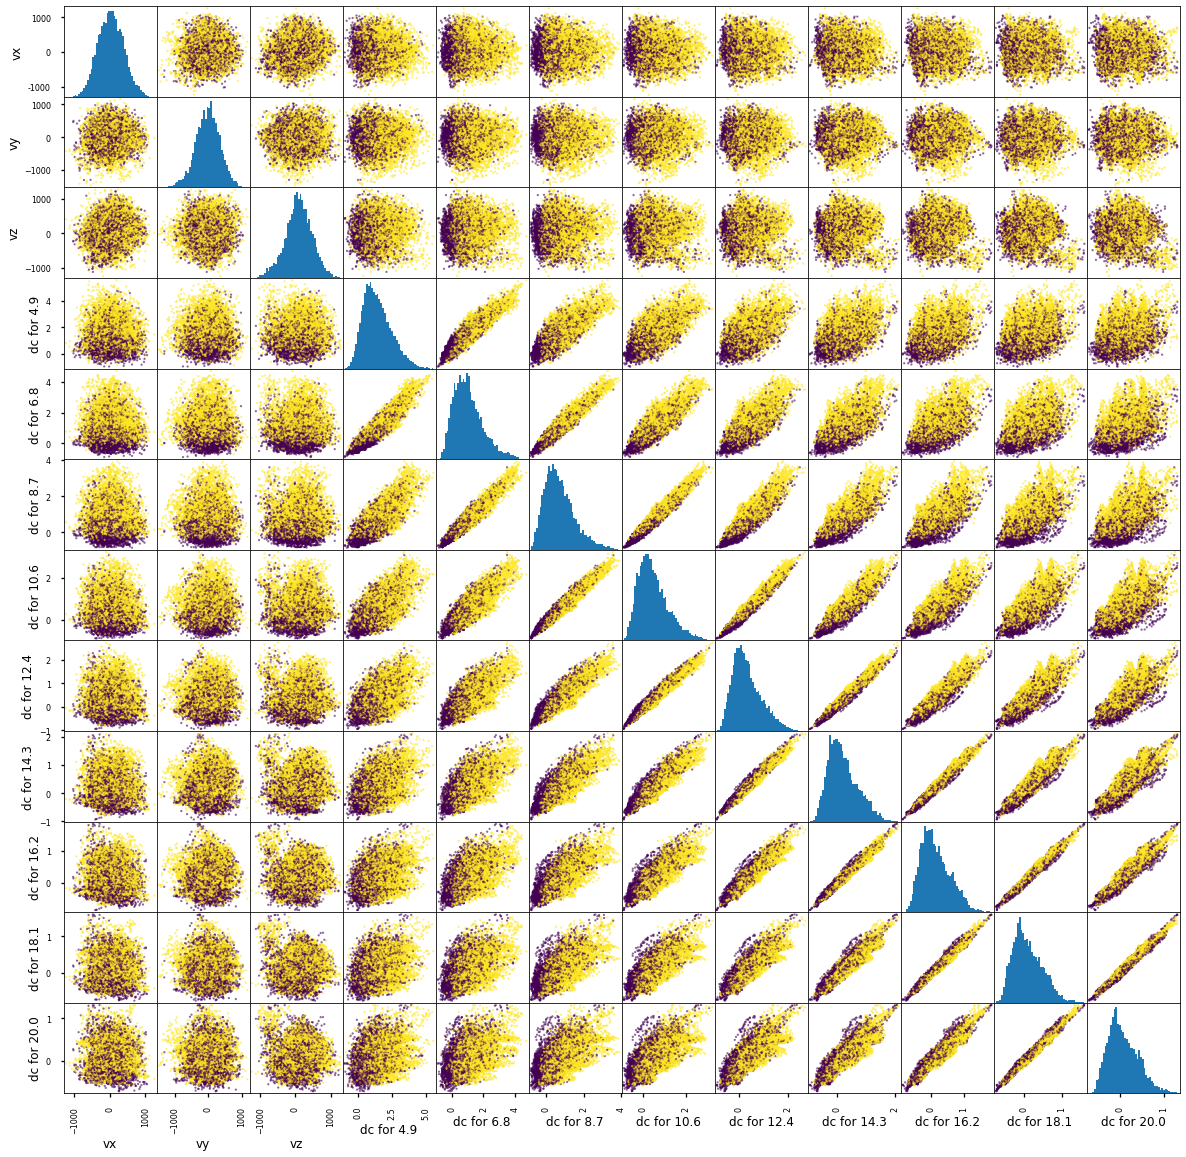

In [10]:
N_sample=10_000
data_mini = data_cdm.sample(N_sample , random_state=0)
target = 'in_halo'

_=pd.plotting.scatter_matrix(data_mini.iloc[:,3:15], c=data_mini[target] , cmap = plt.cm.viridis,
                            figsize=(20,20), marker='o', s=5, 
                            hist_kwds={'bins':50} , alpha = .6)

# Pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
x_tr = torch.from_numpy(X_train).float()
x_ts = torch.from_numpy(X_test).float()

y_tr = torch.from_numpy(Y_train)
y_ts = torch.from_numpy(Y_test)

n_w = x_tr[0].size()
n_out = 10

In [ ]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_feat, 30)  
        self.fc2 = nn.Linear(30, 10)
        self.fc3 = nn.Linear(10, 10)
        self.out = nn.Linear(10, 1)
        


    def forward(self, x):
        # x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.hardtanh(self.fc2(x))
        x = F.elu(self.fc3(x))
        output = self.out(x)
        return output

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=12, out_features=30, bias=True)
  (fc2): Linear(in_features=30, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=1, bias=True)
)


## Training

In [ ]:
net = Net()

optimizer = optim.Adam(net.parameters(), lr=.005, betas=(0.9, 0.999))
# optimizer = optim.RMSprop(net.parameters(), lr=.001, alpha=0.9)

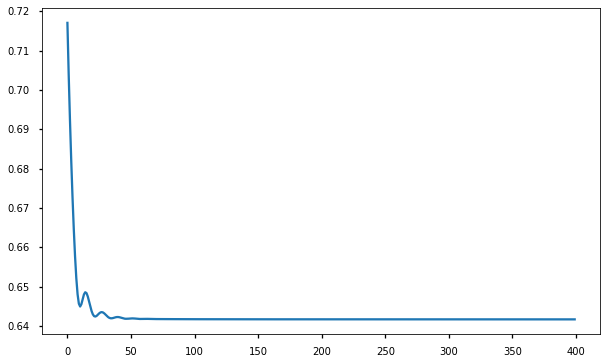

CPU times: user 16.8 s, sys: 615 ms, total: 17.4 s
Wall time: 17.3 s


In [ ]:
%%time
epochs = 400

#We also need to keep track of the loss. 
losses = []

for i in range(epochs):
    #Clear the previous gradients
    optimizer.zero_grad()
    
    #Precit the output for Given input
    y_pred = net.forward(x_tr)
    # y_tr = torch.reshape(y_tr, (65751,1))
    y_pred = torch.sigmoid(torch.reshape(y_pred, (-1,)))
    y_tr = torch.reshape(y_tr, (-1,))#.to(torch.float32)
    loss = nn.BCELoss()
    l = loss(y_pred, y_tr)
    losses += [l]

    l.backward()
    optimizer.step()
    
plt.plot(losses)
plt.show()

## Minibatch


In [ ]:
# del net
net = Net()
optimizer = optim.Adam(net.parameters(), lr=.01)
criterion = nn.NLLLoss()

In [ ]:
x_tr = torch.from_numpy(X_train).float()
x_ts = torch.from_numpy(X_test).float()

y_tr = torch.from_numpy(Y_train)
y_ts = torch.from_numpy(Y_test)

In [ ]:
(net.forward(x_ts).argmax(axis=1)==y_ts).sum()/len(y_ts)
# net.forward(x_ts).argmax(axis=1)

tensor(0.4426)

In [ ]:
n_epoch=3
btch_size = 1000

### Data Loaders

In [ ]:
## Training data
training_dataset = torch.utils.data.TensorDataset(x_tr, y_tr)
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=btch_size, shuffle=True)

## Test data
test_dataset = torch.utils.data.TensorDataset(x_ts, y_ts)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=btch_size, shuffle=True)

In [ ]:
training_dataset[0]

(tensor([-0.5436, -1.2004, -1.7165,  0.3404,  1.2351,  0.3986,  0.3124, -0.2346,
         -0.1404, -0.3011, -0.5421, -0.5848]), tensor(1, dtype=torch.int32))

In [ ]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
for x, y in train_loader:
  print(x.size() )
  # plt.imshow(x[0].numpy())
  print(y[0])
  break

torch.Size([1000, 12])
tensor(1, dtype=torch.int32)


### Training

In [ ]:
%%time
# epochs = 3
# batch_size = 500
n_s = len(x_tr)
n_ts = len(x_ts)


#We also need to keep track of the loss. 
sample_rate = 10
training_losses = []
test_losses = []

training_accuracy = []
test_accuracy = []

for i in range(n_epoch):
  print(f'Starting {i} epoch.')
  # print(len(training_losses))
  ind = 0

  for i, (X_batch, Y_batch) in enumerate(train_loader):
    # X_batch = X_batch.reshape(-1, n_w*n_h)#.to(device)
    Y_batch = Y_batch#.to(device)
    ind += 1

    # Forward pass
    # #Precit the output for Given input
    # outputs = net.forward(X_batch)
    outputs = torch.sigmoid(torch.reshape(outputs, (-1,)))
    Y_batch = torch.reshape(Y_batch, (-1,)).to(torch.float32)
    loss = nn.BCELoss()
    l = loss(outputs, Y_batch)
    
    # Backward and optimize
    #Clear the previous gradients
    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    ## Every sample_rate, we record the loss and accuracy. 
    if ind%(int(n_s/btch_size/sample_rate))==0:

      loss2 = nn.BCELoss()
      y_tr_pred = net.forward(x_tr)
      y_tr_pred = torch.reshape(y_tr_pred, (-1,))
      y_tr = torch.reshape(y_tr, (-1,)).to(torch.float32)
      training_losses += [loss2( y_tr_pred, y_tr).item() ]
      training_accuracy += [torch.sum( y_tr == 
                                      torch.argmax( y_tr_pred, axis=1 ) ).item()/n_s ]

      # print(F.nll_loss( net.forward(x_ts) , y_ts) )
      y_ts_pred = net.forward(x_ts)
      y_ts_pred = torch.reshape(y_ts_pred, (-1,))
      y_ts = torch.reshape(y_ts, (-1,)).to(torch.float32)
      test_losses += [loss2( y_ts_pred, y_ts).item() ]
      test_accuracy += [torch.sum( y_ts == 
                                      torch.argmax( y_ts_pred, axis=1 )).item()/n_ts ]





Starting 0 epoch.


RuntimeError: ignored

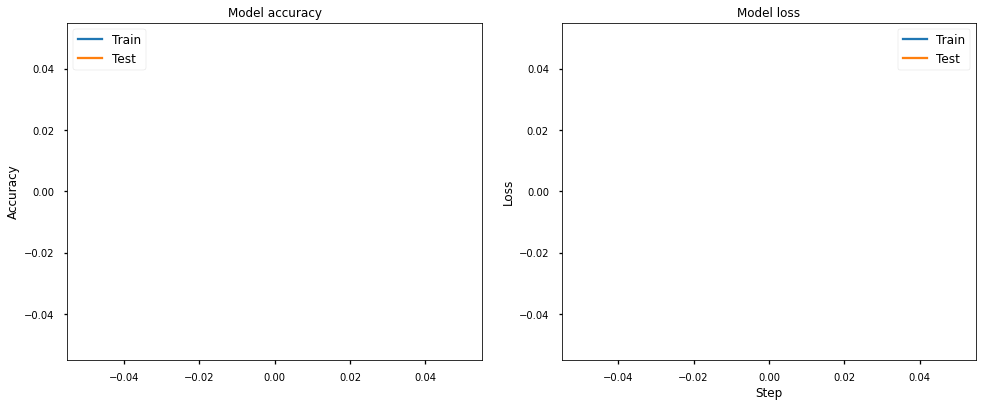

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(training_accuracy)
plt.plot(test_accuracy)
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss', xlabel = 'Step')
plt.plot(training_losses)
plt.plot(test_losses )
plt.legend(['Train', 'Test'], loc=0)

plt.tight_layout()
plt.show()

## Minibatch correct


In [ ]:
# del net
net = Net()
optimizer = optim.Adam(net.parameters(),lr=learning_rate)
criterion = nn.NLLLoss()

In [ ]:
x_tr = torch.from_numpy(X_train).float()
x_ts = torch.from_numpy(X_test).float()

y_tr = torch.from_numpy(Y_train)
y_ts = torch.from_numpy(Y_test)

In [ ]:
(net.forward(x_ts).argmax(axis=1)==y_ts).sum()/len(y_ts)
# net.forward(x_ts).argmax(axis=1)

tensor(0.4421)

In [ ]:
n_epoch=3
btch_size = 1000

### Data Loaders

In [ ]:
## Training data
training_dataset = torch.utils.data.TensorDataset(x_tr, y_tr)
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=btch_size, shuffle=True)

## Test data
test_dataset = torch.utils.data.TensorDataset(x_ts, y_ts)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=btch_size, shuffle=True)

In [ ]:
training_dataset[0]

(tensor([-0.5234, -2.0080, -1.6659, -1.0064, -0.4587, -0.0681,  0.1226,  0.0534,
         -0.2232, -0.6957, -0.9125, -0.9765]), tensor(0, dtype=torch.int32))

In [ ]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [ ]:
for x, y in train_loader:
  print(x.size() )
  # plt.imshow(x[0].numpy())
  print(y[0])
  break

torch.Size([1000, 12])
tensor(1, dtype=torch.int32)


### Training

In [ ]:
%%time
# epochs = 3
# batch_size = 500
n_s = len(x_tr)
n_ts = len(x_ts)


#We also need to keep track of the loss. 
sample_rate = 10
training_losses = []
test_losses = []

training_accuracy = []
test_accuracy = []

for i in range(n_epoch):
  print(f'Starting {i} epoch.')
  # print(len(training_losses))
  ind = 0

  for i, (X_batch, Y_batch) in enumerate(train_loader):
    # X_batch = X_batch.reshape(-1, n_w*n_h)#.to(device)
    # X_batch = torch.reshape(X_batch, (-1,))

    Y_batch = Y_batch#.to(device)
    ind += 1

    # Forward pass
    # #Precit the output for Given input
    outputs = net(X_batch)
    # outputs = torch.reshape(outputs, (-1,))
    # Y_batch = torch.reshape(Y_batch, (-1,))
    # loss = criterion(outputs, Y_batch)
    
    outputs = torch.reshape(outputs, (-1,))
    Y_batch = torch.reshape(Y_batch, (-1,))
    # print(outputs)
    # print(Y_batch)
    loss = F.nll_loss(outputs, Y_batch.long())

    # Backward and optimize
    #Clear the previous gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ## Every sample_rate, we record the loss and accuracy. 
    
    if ind%(int(n_s/btch_size/sample_rate))==0:
      y_tr_pred = net.forward(x_tr)
      y_tr_pred = torch.reshape(y_tr_pred, (-1,))
      y_tr = torch.reshape(y_tr, (-1,))
      training_losses += [F.nll_loss( y_tr_pred, y_tr.long()).item() ]
      training_accuracy += [torch.sum( y_tr == 
                                      torch.argmax( y_tr_pred, axis=0 ) ).item()/n_s ]
      # print("joooje")
      # print(F.nll_loss( net.forward(x_ts) , y_ts) )
      y_ts_pred = net.forward(x_ts)
      y_ts_pred = torch.reshape(y_ts_pred, (-1,))
      y_ts = torch.reshape(y_ts, (-1,))
      test_losses += [F.nll_loss( y_ts_pred, y_ts.long()).item() ]
      test_accuracy += [torch.sum( y_ts == 
                                      torch.argmax( y_ts_pred, axis=0 )).item()/n_ts ]





Starting 0 epoch.
Starting 1 epoch.
Starting 2 epoch.
CPU times: user 3.22 s, sys: 37.3 ms, total: 3.26 s
Wall time: 3.25 s


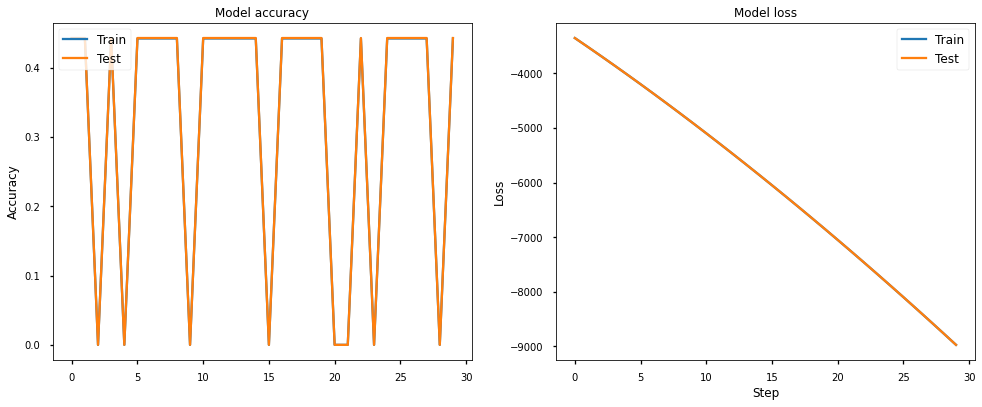

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(training_accuracy)
plt.plot(test_accuracy)
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss', xlabel = 'Step')
plt.plot(training_losses)
plt.plot(test_losses )
plt.legend(['Train', 'Test'], loc=0)

plt.tight_layout()
plt.show()

## GPU

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

n_epoch=3
btch_size = 1000

x_tr = torch.from_numpy(X_train).float()
x_ts = torch.from_numpy(X_test).float()

y_tr = torch.from_numpy(Y_train)
y_ts = torch.from_numpy(Y_test)

## Training data
training_dataset = torch.utils.data.TensorDataset(x_tr, y_tr)
train_loader = torch.utils.data.DataLoader(training_dataset, batch_size=btch_size, shuffle=True)

## Test data
test_dataset = torch.utils.data.TensorDataset(x_ts, y_ts)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=btch_size, shuffle=True)




In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
%%time
n_w = x_tr[0].size()
n_s = len(x_tr)
n_ts = len(x_ts)


#We also need to keep track of the loss. 
sample_rate = 20
training_losses = []
test_losses = []

training_accuracy = []
test_accuracy = []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# model = NeuralNet(n_w * n_h, [100,80], 10).to(device)
model = Net().to(device)

# Loss and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=.01)

# Train the model
total_step = len(train_loader)
for epoch in range(n_epoch):
    print(f'Starting {epoch} epoch.')

    for i, (X_batch, Y_batch) in enumerate(train_loader):  
        # Move tensors to the configured device
        # X_batch = X_batch.reshape(-1, n_w).to(device)
        Y_batch = Y_batch.to(device)
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            

        ## Every sample_rate, we record the loss and accuracy. 
        if i%(int(n_s/btch_size/sample_rate))==0:
          y_tr_pred = model.forward(x_tr.to(device)).cpu()
          training_losses += [F.nll_loss( y_tr_pred, y_tr).item() ]
          training_accuracy += [torch.sum( y_tr == 
                                          torch.argmax( y_tr_pred, axis=1 ) ).item()/n_s ]

          # print(F.nll_loss( net.forward(x_ts) , y_ts) )
          y_ts_pred = model.forward(x_ts.to(device)).cpu()
          test_losses += [F.nll_loss( y_ts_pred, y_ts).item() ]
          test_accuracy += [torch.sum( y_ts == 
                                          torch.argmax( y_ts_pred, axis=1 )).item()/n_ts ]
      

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, Y_batch in test_loader:
        X_batch = X_batch.to(device)
        Y_batch = Y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += Y_batch.size(0)
        correct += (predicted == Y_batch).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Starting 0 epoch.
Starting 1 epoch.
Starting 2 epoch.
Accuracy of the network on the 10000 test images: 88.5 %
CPU times: user 1min 26s, sys: 1.04 s, total: 1min 27s
Wall time: 1min 27s


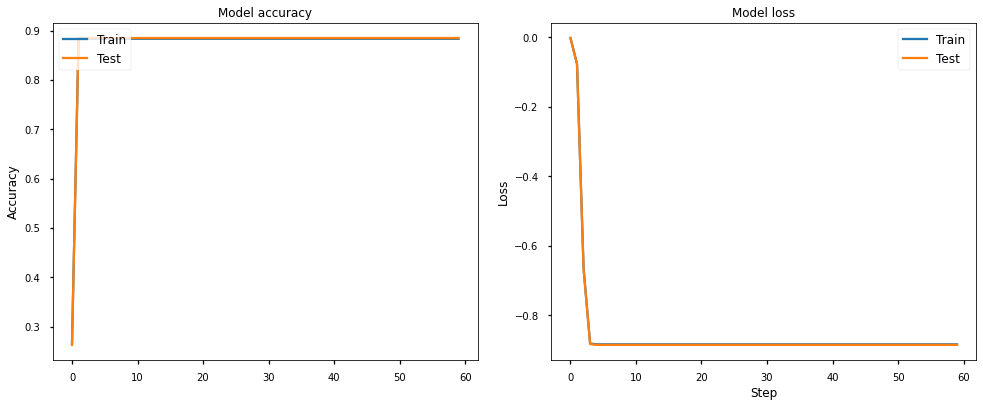

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(training_accuracy)
plt.plot(test_accuracy)
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss', xlabel = 'Step')
plt.plot(training_losses)
plt.plot(test_losses )
plt.legend(['Train', 'Test'], loc=0)

plt.tight_layout()
plt.show()

# Keras / Multi-Class

### Neutrino Labels

In [23]:
### Labeling Based on Mass of Halos

data['in_halo'] = np.zeros(len(data), dtype=int)
mass = data['halo_mass']
j = 0


##_______________________________________________________
# n = min(data['halo_mass'])
# for m in np.logspace(2.8, 4, 5, endpoint=False):
#     inclass = (mass > m).astype('int32')
#     data['in_halo'] += inclass
#     num = np.sum(data['in_halo']==j)
#     print(f'class {j} ({n} < mass < {int(m)} ): {num}')
#     j+=1
#     n = int(m)
# num = np.sum(data['in_halo']==j)
# print(f'class {j} ({n} < mass ): {num}') 
##_______________________________________________________

m1 = 1100
m2 = 1500
m3 = 2000
m4 = 3300
data['in_halo'] = data['in_halo'].astype('int32') + (mass>m1).astype('int32') + (mass>m2).astype('int32') + (mass>m3).astype('int32') + (mass>m4).astype('int32')

for i in range(5):
    num = np.sum(data['in_halo']==j)
    print(f'class {j} : {num}')
    j+=1
    n = int(i)
print(data.in_halo)

class 0 : 21863
class 1 : 18723
class 2 : 16003
class 3 : 24472
class 4 : 18939
0        3
1        2
2        2
3        1
4        2
        ..
99995    3
99996    1
99997    1
99998    0
99999    4
Name: in_halo, Length: 100000, dtype: int32


### CDM Labels

In [22]:
### Labeling Based on Mass of Halos

data_cdm['in_halo'] = np.zeros(len(data_cdm), dtype=int)
mass = data_cdm['halo_mass']
j = 0

m1 = 1100
m2 = 1600
m3 = 2700
m4 = 4000
data_cdm['in_halo'] = data_cdm['in_halo'].astype('int32') + (mass>m1).astype('int32') + (mass>m2).astype('int32') + (mass>m3).astype('int32') + (mass>m4).astype('int32')

for i in range(5):
    num = np.sum(data_cdm['in_halo']==j)
    print(f'class {j} : {num}')
    j+=1
    n = int(i)
print(data_cdm.in_halo)

class 0 : 20677
class 1 : 20403
class 2 : 18370
class 3 : 19662
class 4 : 20888
0        1
1        0
2        0
3        1
4        4
        ..
99995    4
99996    0
99997    0
99998    1
99999    0
Name: in_halo, Length: 100000, dtype: int32


## Define Datasets

In [24]:
X = data.iloc[:,3:15].astype('float32').values
Y = data.in_halo.astype('int32').values

In [25]:
X2 = data_cdm.iloc[:,3:15].astype('float32').values
Y2 = data_cdm.in_halo.astype('int32').values

In [28]:
## Scale
X = (X - np.mean(X))/np.std(X)

In [29]:
## Scale
X2 = (X2 - np.mean(X2))/np.std(X2)

In [31]:
## Split into test and train / Neutrino

tst_size = 0.2
ns, nf = np.shape(X) 
X_train, X_test, Y_train, Y_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X_train :',len(X_train),'   X_test :',len(X_test))

X_train : 80000    X_test : 20000


In [34]:
## Split into test and train / CDM

tst_size = 0.2
ns, nf = np.shape(X) 
X2_train, X2_test, Y2_train, Y2_test = train_test_split(*shuffle(X, Y, n_samples = ns, random_state=0) , random_state=0, test_size =tst_size )
print('X2_train :',len(X2_train),'   X2_test :',len(X2_test))

X2_train : 80000    X2_test : 20000


## Building the Model

In [35]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.losses import MeanSquaredError
from sklearn.metrics import classification_report


model = keras.Sequential()
model.add(layers.Dense(30,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1),activation='relu'))
model.add(layers.Dense(10,kernel_initializer=keras.initializers.RandomUniform(minval=-0.5, maxval=0.5, seed=1), input_shape=(12,),activation='tanh'))
model.add(keras.layers.Dense(5))


model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer = keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-06), metrics=['Accuracy'])

## Keras on Neutrino

In [37]:
hist1 = model.fit(
    X_train,
    Y_train,
    batch_size= 100,
    epochs=20,
    verbose=2,
    validation_split=.2,
    shuffle=True,
)

Epoch 1/20
640/640 - 2s - loss: 1.5150 - Accuracy: 0.3160 - val_loss: 1.5158 - val_Accuracy: 0.3165 - 2s/epoch - 3ms/step
Epoch 2/20
640/640 - 2s - loss: 1.5149 - Accuracy: 0.3184 - val_loss: 1.5143 - val_Accuracy: 0.3241 - 2s/epoch - 3ms/step
Epoch 3/20
640/640 - 2s - loss: 1.5138 - Accuracy: 0.3200 - val_loss: 1.5151 - val_Accuracy: 0.3172 - 2s/epoch - 2ms/step
Epoch 4/20
640/640 - 1s - loss: 1.5133 - Accuracy: 0.3198 - val_loss: 1.5203 - val_Accuracy: 0.3169 - 1s/epoch - 2ms/step
Epoch 5/20
640/640 - 1s - loss: 1.5127 - Accuracy: 0.3187 - val_loss: 1.5162 - val_Accuracy: 0.3163 - 1s/epoch - 2ms/step
Epoch 6/20
640/640 - 1s - loss: 1.5126 - Accuracy: 0.3180 - val_loss: 1.5159 - val_Accuracy: 0.3200 - 1s/epoch - 2ms/step
Epoch 7/20
640/640 - 1s - loss: 1.5126 - Accuracy: 0.3175 - val_loss: 1.5249 - val_Accuracy: 0.3103 - 997ms/epoch - 2ms/step
Epoch 8/20
640/640 - 1s - loss: 1.5126 - Accuracy: 0.3173 - val_loss: 1.5152 - val_Accuracy: 0.3220 - 1s/epoch - 2ms/step
Epoch 9/20
640/640 - 

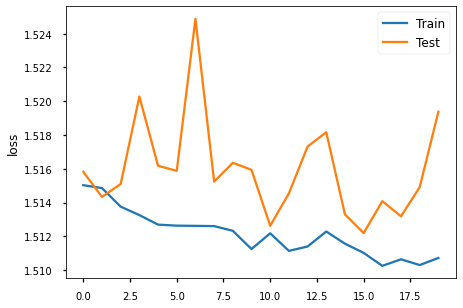

In [39]:
fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(1,1,1, ylabel= 'loss')
ax1.plot(hist1.history['loss'])
ax1.plot(hist1.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Tune HP

In [40]:
!pip install -q -U keras-tuner
import keras_tuner as kt

     |████████████████████████████████| 98 kB 3.1 MB/s 


In [41]:
# https://www.tensorflow.org/tutorials/keras/keras_tuner
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(12, )))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=12, max_value=40, step=2)
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='relu', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='tanh', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(5))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 2e-2])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [42]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     project_name='kt1')

In [43]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [44]:
tuner.search(X_train, Y_train, 
             epochs=50, 
             batch_size = 100, 
             validation_split=0.2, 
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 16s]
val_accuracy: 0.28025001287460327

Best val_accuracy So Far: 0.28331249952316284
Total elapsed time: 00h 04m 48s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 36 and the optimal learning rate for the optimizer
is 0.0001.



### Best Model

In [53]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, Y_train, 
                    epochs=30, 
                    batch_size = 100, 
                    validation_data=(X_test, Y_test))

val_acc_per_epoch = history.history['val_accuracy']
best_n = max(val_acc_per_epoch)
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/30
800/800 [==============================] - 6s 6ms/step - loss: 3.5338 - accuracy: 0.2426 - val_loss: 2.8721 - val_accuracy: 0.2692
Epoch 2/30
800/800 [==============================] - 2s 2ms/step - loss: 2.4648 - accuracy: 0.2706 - val_loss: 2.1375 - val_accuracy: 0.2747
Epoch 3/30
800/800 [==============================] - 2s 2ms/step - loss: 1.9461 - accuracy: 0.2699 - val_loss: 1.7951 - val_accuracy: 0.2684
Epoch 4/30
800/800 [==============================] - 2s 2ms/step - loss: 1.7166 - accuracy: 0.2650 - val_loss: 1.6556 - val_accuracy: 0.2630
Epoch 5/30
800/800 [==============================] - 2s 2ms/step - loss: 1.6300 - accuracy: 0.2617 - val_loss: 1.6087 - val_accuracy: 0.2601
Epoch 6/30
800/800 [==============================] - 2s 2ms/step - loss: 1.6034 - accuracy: 0.2580 - val_loss: 1.5963 - val_accuracy: 0.2654
Epoch 7/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5966 - accuracy: 0.2594 - val_loss: 1.5930 - val_accuracy: 0.2627
Epoch 

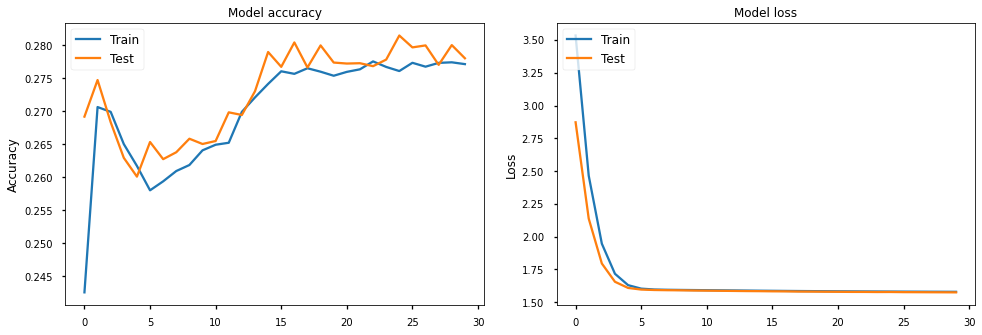

In [54]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

### Classification Report

In [65]:
from sklearn.metrics import classification_report
clf_report_n = classification_report(Y_test, model.predict(X_test).argmax(axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm_n = confusion_matrix(Y_test, model.predict(X_test).argmax(axis=1))

## Keras on CDM

In [67]:
hist2 = model.fit(
    X2_train,
    Y2_train,
    batch_size= 100,
    epochs=20,
    verbose=2,
    validation_split=.2,
    shuffle=True,
)

Epoch 1/20
640/640 - 2s - loss: 1.5785 - accuracy: 0.2766 - val_loss: 1.5796 - val_accuracy: 0.2801 - 2s/epoch - 3ms/step
Epoch 2/20
640/640 - 2s - loss: 1.5783 - accuracy: 0.2781 - val_loss: 1.5791 - val_accuracy: 0.2781 - 2s/epoch - 3ms/step
Epoch 3/20
640/640 - 2s - loss: 1.5781 - accuracy: 0.2764 - val_loss: 1.5788 - val_accuracy: 0.2789 - 2s/epoch - 3ms/step
Epoch 4/20
640/640 - 1s - loss: 1.5778 - accuracy: 0.2782 - val_loss: 1.5789 - val_accuracy: 0.2792 - 1s/epoch - 2ms/step
Epoch 5/20
640/640 - 1s - loss: 1.5776 - accuracy: 0.2775 - val_loss: 1.5786 - val_accuracy: 0.2781 - 1s/epoch - 2ms/step
Epoch 6/20
640/640 - 1s - loss: 1.5774 - accuracy: 0.2775 - val_loss: 1.5785 - val_accuracy: 0.2804 - 1s/epoch - 2ms/step
Epoch 7/20
640/640 - 1s - loss: 1.5772 - accuracy: 0.2765 - val_loss: 1.5784 - val_accuracy: 0.2792 - 1s/epoch - 2ms/step
Epoch 8/20
640/640 - 1s - loss: 1.5769 - accuracy: 0.2778 - val_loss: 1.5778 - val_accuracy: 0.2786 - 1s/epoch - 2ms/step
Epoch 9/20
640/640 - 1s 

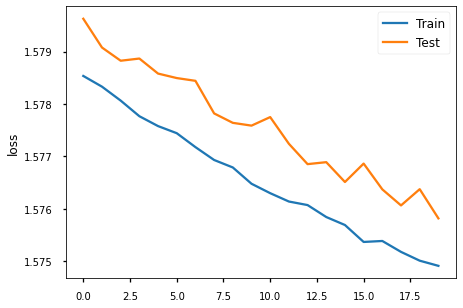

In [68]:
fig = plt.figure(figsize=(7,5))

ax1 = fig.add_subplot(1,1,1, ylabel= 'loss')
ax1.plot(hist2.history['loss'])
ax1.plot(hist2.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

### Tune HP

In [69]:
# https://www.tensorflow.org/tutorials/keras/keras_tuner
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(12, )))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=12, max_value=40, step=2)
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='relu', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(units=hp_units, 
                               activation='tanh', 
                               kernel_regularizer=keras.regularizers.l2(.05)))
  model.add(keras.layers.Dense(5))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 2e-2])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [70]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     project_name='kt2')

In [71]:
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [72]:
tuner.search(X2_train, Y2_train, 
             epochs=50, 
             batch_size = 100, 
             validation_split=0.2, 
             callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 42s]
val_accuracy: 0.2826874852180481

Best val_accuracy So Far: 0.2826874852180481
Total elapsed time: 00h 06m 19s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 30 and the optimal learning rate for the optimizer
is 0.001.



### Best Model

In [73]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X2_train, Y2_train, 
                    epochs=30, 
                    batch_size = 100, 
                    validation_data=(X2_test, Y2_test))

val_acc_per_epoch = history.history['val_accuracy']
best_CDM = max(val_acc_per_epoch)
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/30
800/800 [==============================] - 2s 2ms/step - loss: 1.9352 - accuracy: 0.2613 - val_loss: 1.5936 - val_accuracy: 0.2504
Epoch 2/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5941 - accuracy: 0.2591 - val_loss: 1.5897 - val_accuracy: 0.2594
Epoch 3/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5903 - accuracy: 0.2693 - val_loss: 1.5855 - val_accuracy: 0.2702
Epoch 4/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5862 - accuracy: 0.2749 - val_loss: 1.5801 - val_accuracy: 0.2763
Epoch 5/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5829 - accuracy: 0.2746 - val_loss: 1.5785 - val_accuracy: 0.2831
Epoch 6/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5805 - accuracy: 0.2768 - val_loss: 1.5754 - val_accuracy: 0.2779
Epoch 7/30
800/800 [==============================] - 2s 2ms/step - loss: 1.5788 - accuracy: 0.2782 - val_loss: 1.5730 - val_accuracy: 0.2789
Epoch 

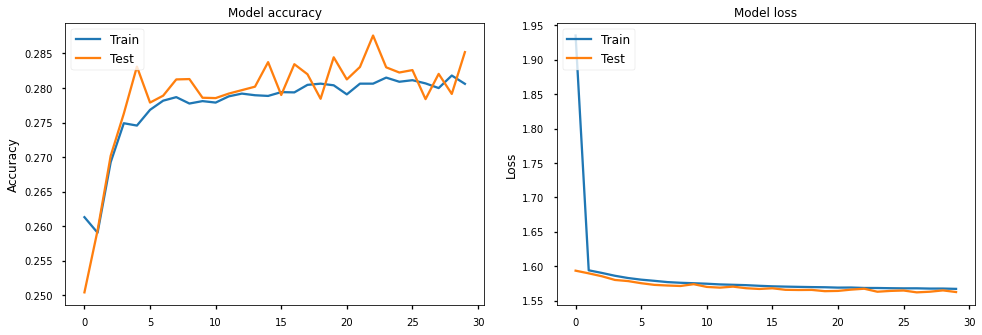

In [74]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(1,2,1, title = 'Model accuracy', ylabel= 'Accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax = fig.add_subplot(1,2,2, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

### Classification Report

In [75]:
from sklearn.metrics import classification_report
clf_report_CDM = classification_report(Y2_test, model.predict(X2_test).argmax(axis=1))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm_CDM = confusion_matrix(Y2_test, model.predict(X2_test).argmax(axis=1))

## Compare Results

Best Accuracy on Neutrino: 0.2815000116825104
              precision    recall  f1-score   support

           0       0.23      0.10      0.13      4429
           1       0.25      0.25      0.25      3719
           2       0.00      0.00      0.00      3208
           3       0.29      0.66      0.40      4931
           4       0.30      0.26      0.28      3713

    accuracy                           0.28     20000
   macro avg       0.21      0.25      0.21     20000
weighted avg       0.22      0.28      0.23     20000

--------------------
Best Accuracy on CDM: 0.28760001063346863
              precision    recall  f1-score   support

           0       0.23      0.14      0.18      4429
           1       0.28      0.18      0.22      3719
           2       0.00      0.00      0.00      3208
           3       0.30      0.58      0.40      4931
           4       0.29      0.41      0.34      3713

    accuracy                           0.29     20000
   macro avg       0.2

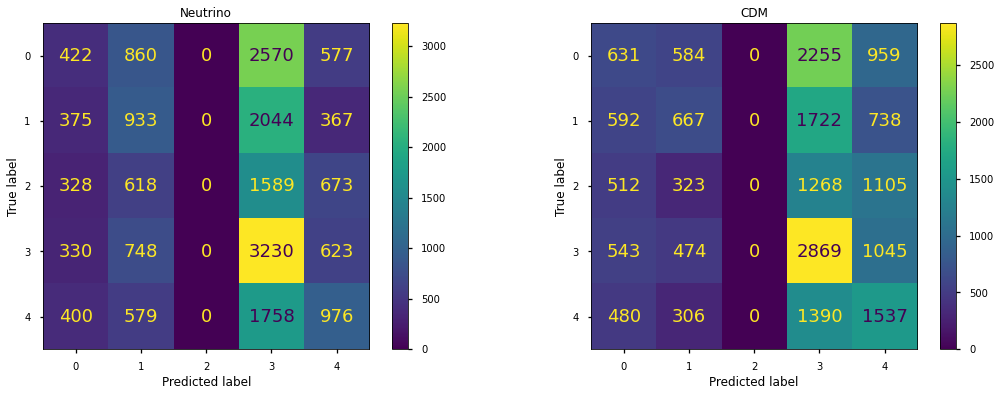

In [77]:
print(f'Best Accuracy on Neutrino: {best_n}')
print(clf_report_n)
print('-'*20)

print(f'Best Accuracy on CDM: {best_CDM}')
print(clf_report_CDM)

fig = plt.figure(figsize=(18,6))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_n)
ax1 = fig.add_subplot(1,2,1, title='Neutrino')
disp1.plot(ax=ax1)

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_CDM)
ax2 = fig.add_subplot(1,2,2, title='CDM')
disp2.plot(ax=ax2)
plt.show()